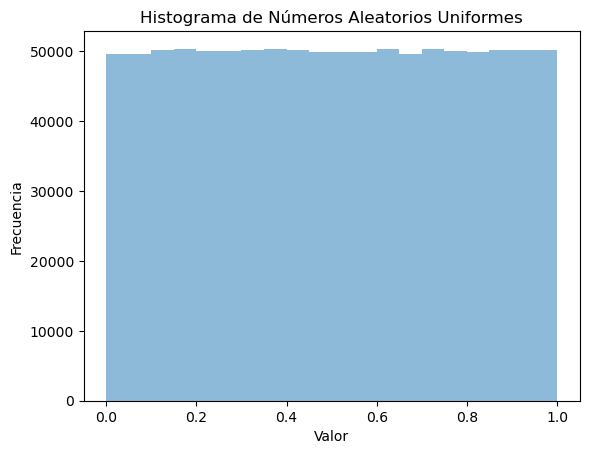

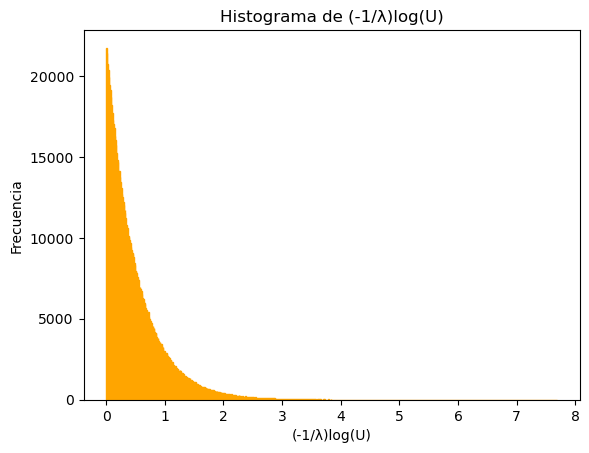

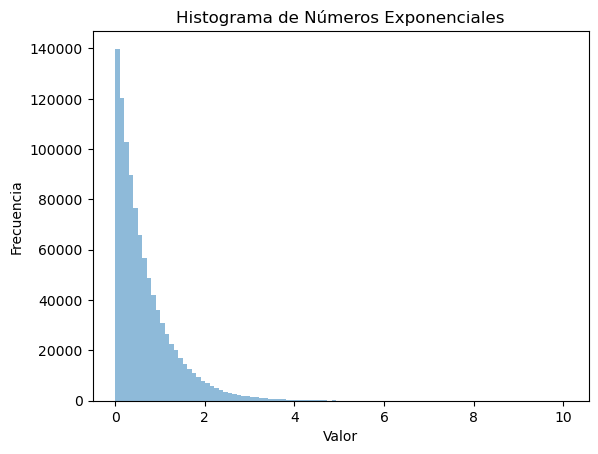


Proceso de Poisson generado:
  [0.3375951658681287, 0.551886354414692, 1.2061883663822233, 1.3003656278390572, 1.8749278200421875, 2.950078650999976, 5.441810709913255, 5.487674307085015, 5.542953217209701, 6.319364482982094, 6.338763613586822, 6.478841990380418, 6.773026123693084, 7.7058073621094865, 7.9100110304683175, 8.19784054568076, 8.542887926035114, 8.588229949795195, 8.850791969184765, 9.60223640794535]

Proceso de Poisson generado con tiempos de eventos:
 [0.4753824590670358, 1.2468820929571223, 1.4463748375653989, 2.273991750507511, 3.706440750523569, 4.780353984903472, 5.43780736126578, 5.961588223886074, 6.632133124080292, 6.777407149747375, 6.919771040912059, 9.475715143709596, 9.510867754416312]

Tiempo medio de permanencia de las piezas en el proceso:
 3.039233636518742 minutos


In [5]:
import random
import math
import matplotlib.pyplot as plt


def generar_numeros_aleatorios_uniformes(n):
    return [random.uniform(0, 1) for _ in range(n)]


def calcular_resultados(numeros, lambda_value):
    return [(-1 / lambda_value) * math.log(num) for num in numeros]


def generar_numeros_exponenciales(n, lambd):
    return [random.expovariate(lambd) for _ in range(n)]


def generar_poisson(T, lambd):
    t = 0
    S = []

    while t <= T:
        U = random.uniform(0, 1)
        t += -math.log(U) / lambd

        if t > T:
            break

        S.append(t)

    return S


def generar_poisson_process(T, lambd):
    t = 0
    S = []

    while t < T:
        U = random.uniform(0, 1)
        t_n = t - (1 / lambd) * math.log(U)

        if t_n > T:
            break

        t = t_n
        S.append(t)

    return S


def tiempo_llegada_piezas():
    return random.expovariate(0.5)


def tiempo_tarea():
    return random.expovariate(1)


def tiempo_permanencia(num_piezas):
    tiempos = [tiempo_llegada_piezas() + tiempo_tarea() for _ in range(num_piezas)]
    return sum(tiempos) / num_piezas


# Parámetros
n = 1000000
lambda_value = 2.0
T = 10
lambd = 1.5
num_piezas = 1000

# Generar números aleatorios uniformes
numeros_aleatorios = generar_numeros_aleatorios_uniformes(n)

# Calcular resultados
resultados = calcular_resultados(numeros_aleatorios, lambda_value)

# Generar números exponenciales
numeros_exponenciales = generar_numeros_exponenciales(n, lambd)

# Generar proceso de Poisson
proceso_poisson = generar_poisson(T, lambd)

# Generar proceso de Poisson con tiempos de eventos
proceso_poisson_eventos = generar_poisson_process(T, lambd)

# Calcular tiempo medio de permanencia
tiempo_medio_permanencia = tiempo_permanencia(num_piezas)

# Graficar histograma de números aleatorios uniformes
plt.hist(numeros_aleatorios, bins=20, alpha=0.5)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Números Aleatorios Uniformes')
plt.show()

# Graficar histograma de resultados
plt.hist(resultados, bins='auto', edgecolor='orange')
plt.xlabel('(-1/λ)log(U)')
plt.ylabel('Frecuencia')
plt.title('Histograma de (-1/λ)log(U)')
plt.show()

# Graficar histograma de números exponenciales
plt.hist(numeros_exponenciales, bins=100, alpha=0.5)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Números Exponenciales')
plt.show()

# Imprimir proceso de Poisson
print("\nProceso de Poisson generado:\n ", proceso_poisson)

# Imprimir proceso de Poisson con tiempos de eventos
print("\nProceso de Poisson generado con tiempos de eventos:\n", proceso_poisson_eventos)

# Imprimir tiempo medio de permanencia
print("\nTiempo medio de permanencia de las piezas en el proceso:\n", tiempo_medio_permanencia, "minutos")
